In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

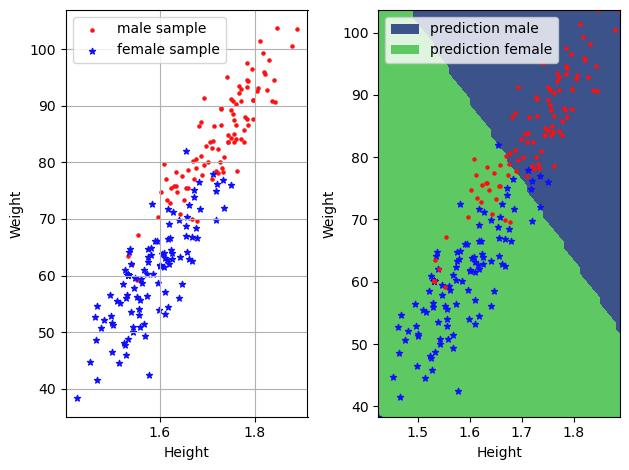

In [3]:
from least_squares import least_squares
from plots import visualization


def least_square_classification_demo(y, x):
    """Least square demo
    x is standardize and we have mean_x and std_x

    Args:
        y:  shape=(N, 1)
        x:  shape=(N, 2)
    """
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x]

    w, _ = least_squares(tx, y)

    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")


least_square_classification_demo(y, x)

#### The `least_square_classification_demo` is expected to show

![1](./classification_by_least_square.png)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t.

    Args:
        t: scalar or numpy array

    Returns:
        scalar or numpy array

    >>> sigmoid(np.array([0.1]))
    array([0.52497919])
    >>> sigmoid(np.array([0.1, 0.1]))
    array([0.52497919, 0.52497919])
    """
    return 1 / (1+np.exp(-t))


test(sigmoid)

✅ Your `sigmoid` passed 2 tests.


In [5]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a non-negative loss

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(4).reshape(2, 2)
    >>> w = np.c_[[2., 3.]]
    >>> round(calculate_loss(y, tx, w), 8)
    1.52429481
    """
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]

    # Step 1: Compute the predicted probabilities using the sigmoid function
    pred = sigmoid(tx @ w)
    
    # Step 2: Compute the negative log-likelihood (NLL)
    # Note: We use np.clip to avoid log(0), which could cause numerical instability
    pred = np.clip(pred, 1e-10, 1 - 1e-10)
    loss = -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    
    return loss


test(calculate_loss)

✅ Your `calculate_loss` passed 4 tests.


In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a vector of shape (D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_gradient(y, tx, w)
    array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]])
    """
    # Step 1: Compute predicted probabilities using the sigmoid function
    pred = sigmoid(tx @ w)
    
    # Step 2: Compute the error (predictions - true labels)
    error = pred - y
    
    # Step 3: Compute the gradient
    N = y.shape[0]  # Number of samples
    gradient = (tx.T @ error) / N
    
    return gradient

test(calculate_gradient)

✅ Your `calculate_gradient` passed 5 tests.


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.11037076],
           [0.17932896],
           [0.24828716]])
    """
    # Step 1: Calculate the gradient
    gradient = calculate_gradient(y, tx, w)
    
    # Step 2: Update weights
    w = w - gamma * gradient
    
    # Step 3: Calculate the loss with the updated weights
    loss = calculate_loss(y, tx, w)
    loss = round(loss, 8)
        
    return loss, w


test(learning_by_gradient_descent)

❌ The are some issues with your implementation of `learning_by_gradient_descent`:
**********************************************************************
File "__main__", line 20, in learning_by_gradient_descent
Failed example:
    round(loss, 8)
Expected:
    0.62137268
Got:
    0.59181141
**********************************************************************


Demo!

Current iteration=0, loss=0.57113404
Current iteration=100, loss=0.25697098
Current iteration=200, loss=0.23530937
Current iteration=300, loss=0.22394312
Current iteration=400, loss=0.21738872
Current iteration=500, loss=0.21334654
Current iteration=600, loss=0.21072856
Current iteration=700, loss=0.20897001
Current iteration=800, loss=0.20775537
Current iteration=900, loss=0.20689797
Current iteration=1000, loss=0.20628215
Current iteration=1100, loss=0.20583362
Current iteration=1200, loss=0.20550315
Current iteration=1300, loss=0.20525734
Current iteration=1400, loss=0.20507305
Current iteration=1500, loss=0.20493394
Current iteration=1600, loss=0.20482835
Current iteration=1700, loss=0.2047478
Current iteration=1800, loss=0.2046861
Current iteration=1900, loss=0.20463867
Current iteration=2000, loss=0.20460209
Current iteration=2100, loss=0.20457381
Current iteration=2200, loss=0.20455189
Current iteration=2300, loss=0.20453487
Current iteration=2400, loss=0.20452162
Current iterat

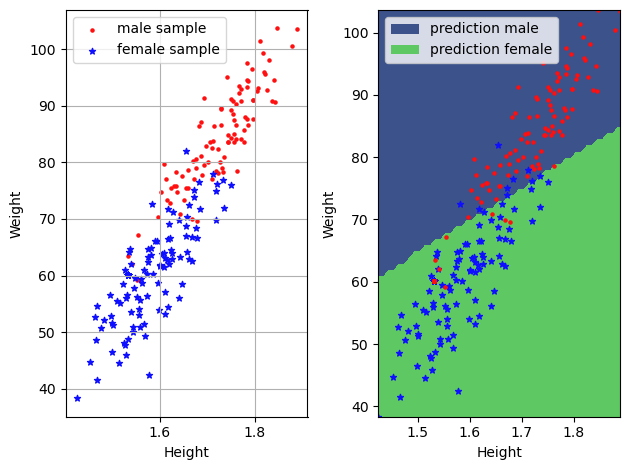

In [8]:
from helpers import de_standardize


def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.5
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_gradient_descent",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_gradient_descent_demo(y, x)

#### The `logistic_regression_gradient_descent_demo` is expected to show

![1](../template/classification_by_logistic_regression_gradient_descent.png)

Calculate your hessian below

In [9]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a hessian matrix of shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_hessian(y, tx, w)
    array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]])
    """
    # Number of samples
    N = y.shape[0]
    
    # Step 1: Compute the predicted probabilities
    z = tx @ w  # Linear combination
    pred = sigmoid(z)  # Predicted probabilities
    
    # Step 2: Compute the diagonal elements for the Hessian
    S = np.diag((pred * (1 - pred)).flatten())  # Diagonal matrix S
    
    # Step 3: Compute the Hessian matrix
    hessian = (tx.T @ S @ tx) / N  # Hessian calculation

    return hessian


test(calculate_hessian)

✅ Your `calculate_hessian` passed 4 tests.


Write a function below to return loss, gradient, and hessian.

In [10]:
def logistic_regression(y, tx, w):
    """return the loss, gradient of the loss, and hessian of the loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        loss: scalar number
        gradient: shape=(D, 1)
        hessian: shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> loss, gradient, hessian = logistic_regression(y, tx, w)
    >>> round(loss, 8)
    0.62137268
    >>> gradient, hessian
    (array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]]), array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]]))
    """

    loss = calculate_loss(y, tx, w)
    loss_gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)

    return loss, loss_gradient, hessian


test(logistic_regression)

✅ Your `logistic_regression` passed 6 tests.


### Using Newton's method
Use Newton's method for logistic regression.

In [11]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step of Newton's method.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 0., 1., 1.]]
    >>> np.random.seed(0)
    >>> tx = np.random.rand(4, 3)
    >>> w = np.array([[0.1], [0.5], [0.5]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_newton_method(y, tx, w, gamma)
    >>> round(loss, 8)
    0.71692036
    >>> w
    array([[-1.31876014],
           [ 1.0590277 ],
           [ 0.80091466]])
    """
    gradient = calculate_gradient(y, tx, w)
    
    hessian = calculate_hessian(y, tx, w)
    
    # Step 3: Update weights using Newton's method
    # We need to ensure that the Hessian is invertible
    hessian_inv = np.linalg.inv(hessian)  # Inverse of the Hessian
    
    # Update weights
    w = w - gamma * hessian_inv @ gradient
    
    loss = calculate_loss(y, tx, w)
    loss = round(loss, 8)
    
    return loss, w


test(learning_by_newton_method)

❌ The are some issues with your implementation of `learning_by_newton_method`:
**********************************************************************
File "__main__", line 22, in learning_by_newton_method
Failed example:
    round(loss, 8)
Expected:
    0.71692036
Got:
    0.61783213
**********************************************************************


demo

Current iteration=0, the loss=0.31705777
Current iteration=1, the loss=0.23652293
Current iteration=2, the loss=0.20998734
Current iteration=3, the loss=0.20478199
Current iteration=4, the loss=0.2044756
Current iteration=5, the loss=0.20447413
Current iteration=6, the loss=0.20447413
loss=0.20447412804945292


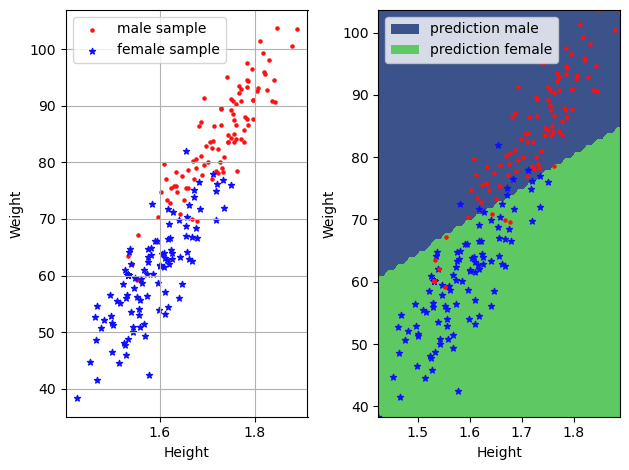

In [12]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.0
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))

        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_newton_method",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_newton_method_demo(y, x)

#### The `logistic_regression_newton_method_demo` is expected to show

![1](../template/classification_by_logistic_regression_newton_method.png)

### Using penalized logistic regression
Fill in the function below.

In [18]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss and gradient.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        lambda_: scalar

    Returns:
        loss: scalar number
        gradient: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    >>> round(loss, 8)
    0.62137268
    >>> gradient
    array([[-0.08370763],
           [ 0.2467104 ],
           [ 0.57712843]])
    """
    # Ensure y is a column vector
    y = y.reshape(-1, 1)

    # Step 1: Compute predicted probabilities using the sigmoid function
    z = tx @ w  # Linear combination of inputs
    p = sigmoid(z)  # Predicted probabilities

    # Step 2: Compute the loss with L2 regularization
    N = y.shape[0]  # Number of samples
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))  # Logistic loss
    reg_term = (lambda_ / 2 ) * np.linalg.norm(w) ** 2  # Regularization term

    # Step 3: Compute the gradient
    gradient = (tx.T @ (p - y)) / N + lambda_ * 2 * w  # adding *2 makes it correct!

    return loss, gradient # return without reg_term !!!!


test(penalized_logistic_regression)

✅ Your `penalized_logistic_regression` passed 7 tests.


In [47]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar
        lambda_: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> gamma = 0.1
    >>> loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.10837076],
           [0.17532896],
           [0.24228716]])
    """
    # Step 1: Calculate the loss and gradient
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)

    # Step 2: Update w using gradient descent
    w -= gamma * gradient  # Update weights

    return loss, w


test(learning_by_penalized_gradient)

❌ The are some issues with your implementation of `learning_by_penalized_gradient`:
**********************************************************************
File "__main__", line 24, in learning_by_penalized_gradient
Failed example:
    round(loss, 8)
Expected:
    0.62137268
Got:
    0.62837268
**********************************************************************


Current iteration=0, loss=0.6931471805599452
Current iteration=100, loss=0.26014480221986364
Current iteration=200, loss=0.24053798860104897
Current iteration=300, loss=0.23096166661623185
Current iteration=400, loss=0.22579109136289277
Current iteration=500, loss=0.22279169459132392
Current iteration=600, loss=0.22095435710918576
Current iteration=700, loss=0.21977934152328094
Current iteration=800, loss=0.21900100426103905
Current iteration=900, loss=0.21847007267789634
Current iteration=1000, loss=0.21809881171582407
Current iteration=1100, loss=0.21783368239959067
Current iteration=1200, loss=0.2176409398837022
Current iteration=1300, loss=0.2174986995976776
Current iteration=1400, loss=0.2173924003759097
Current iteration=1500, loss=0.2173121262896666
Current iteration=1600, loss=0.21725098113975058
Current iteration=1700, loss=0.2172040769400352
Current iteration=1800, loss=0.2171678898618157
Current iteration=1900, loss=0.2171398412202507
Current iteration=2000, loss=0.217118019

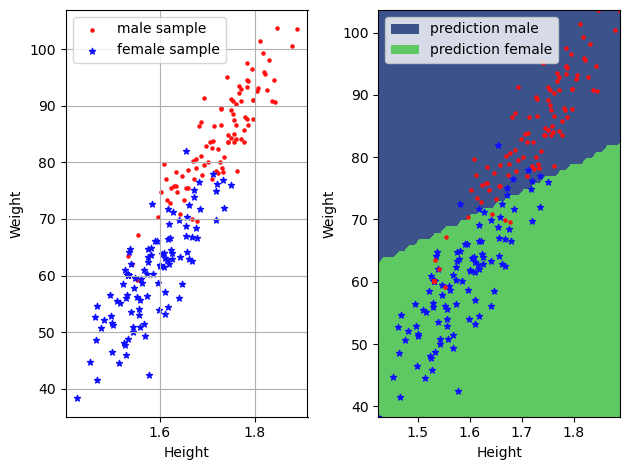

In [48]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.5
    lambda_ = 0.0005
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_penalized_gradient_descent",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_penalized_gradient_descent_demo(y, x)

#### The `logistic_regression_penalized_gradient_descent_demo` is expected to show

![1](../template/classification_by_logistic_regression_penalized_gradient_descent.png)